To find the "best" communities, we need to know how much entertainment content is a good measure of a community. Therefore, I selected the dataset of playground in the city for analysis in the database.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("47350364-44a8-4d15-b6e0-5f79ddff9367.csv")
df = df.dropna(1)
df.head(125)

C:\Users\Jack\AppData\Local\Temp/ipykernel_19112/2900114110.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna(1)


,id,name,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,18942817,Ammon Playground,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...
120,1199980206,Phillips Lower Playground,Carrick,4,29,42003290400,3,29,3,4-23,40.388144,-79.990309
121,2108783707,Duncan Park Playground,Upper Lawrenceville,7,10,42003101100,2,10,2,3-5,40.480246,-79.948461
122,675610013,McKinley Upper Playground,Beltzhoover,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950
123,1683700344,Liberty Green Playground,East Liberty,9,11,42003111500,2,11,5,3-10,40.462951,-79.919097


The first thing I show you is the whole data, and you can see that it's 125 lines, so it's a lot of information.

I notice the latitude and longitude of play Group HND in the later columns of the dataset table

So I made the latitude and longitude chart below

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

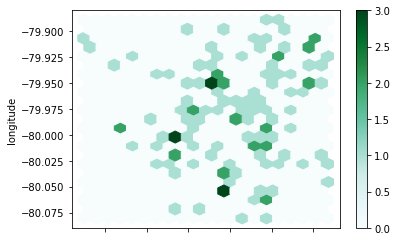

In [19]:
df.plot.hexbin(x='latitude', y='longitude', gridsize=20)

Although we can see the dark dots on the icon, we still don't know exactly which neighborhoods these dark dots are.

So I'm going to list all the communities

In [27]:
data = pd.read_csv("47350364-44a8-4d15-b6e0-5f79ddff9367.csv", index_col="neighborhood", parse_dates=True)
data.head(125)

,id,name,type,maintenance_responsibility,park,street,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,
Beechview,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
Crawford-Roberts,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
Central Northside,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
Beechview,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
Bedford Dwellings,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Carrick,1199980206,Phillips Lower Playground,NaN,NaN,NaN,NaN,NaN,4,29,42003290400,3,29,3,4-23,40.388144,-79.990309
Upper Lawrenceville,2108783707,Duncan Park Playground,NaN,NaN,Duncan Park,DUNCAN ST,NaN,7,10,42003101100,2,10,2,3-5,40.480246,-79.948461
Beltzhoover,675610013,McKinley Upper Playground,NaN,NaN,McKinley Park,MICHIGAN ST,NaN,4,18,42003562400,5,18,3,4-16,40.415730,-80.002950


In [ ]:
I then tried the following chart, which I found to be of little use.

<AxesSubplot:xlabel='neighborhood'>

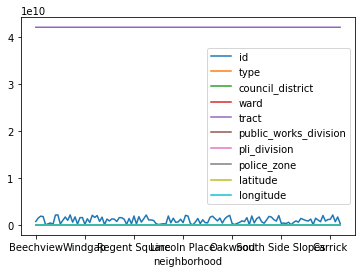

In [28]:
data.plot()

Therefore, I found that the number of playground owned by each community could be obtained by counting the number of times that each community appeared in the table.

In [2]:
import csv

with open('47350364-44a8-4d15-b6e0-5f79ddff9367.csv') as f:
    center_neighborhood_pandas = [row for row in csv.reader(f)]

In [3]:
center_counter = dict()

for row in center_neighborhood_pandas[1:]:
    center = row[7]
    
    if center not in center_counter:
        center_counter[center] = 1
    else:
        center_counter[center] = center_counter[center] + 1
center_counter

{'Beechview': 5,
 'Crawford-Roberts': 3,
 'Central Northside': 2,
 'Bedford Dwellings': 1,
 'South Side Slopes': 5,
 'South Side Flats': 2,
 'Lower Lawrenceville': 1,
 'Banksville': 1,
 'Homewood North': 1,
 'Bon Air': 1,
 'Central Oakland': 1,
 'Brighton Heights': 2,
 'Brookline': 2,
 'Hazelwood': 3,
 'Squirrel Hill South': 8,
 'Spring Garden': 1,
 'Lincoln-Lemington-Belmar': 2,
 'Windgap': 1,
 'Troy Hill': 2,
 'Westwood': 1,
 'Perry South': 1,
 'Homewood West': 1,
 'Allegheny Center': 4,
 'Strip District': 1,
 'Stanton Heights': 1,
 'Crafton Heights': 2,
 'West Oakland': 1,
 'East Carnegie': 1,
 'Duquesne Heights': 1,
 'East Liberty': 3,
 'Esplen': 1,
 'Fairywood': 1,
 'Highland Park': 4,
 'Upper Lawrenceville': 3,
 'Fineview': 1,
 'Regent Square': 1,
 'Garfield': 2,
 'Greenfield': 2,
 'South Oakland': 3,
 'Allentown': 1,
 'Hays': 1,
 'Elliott': 3,
 'Morningside': 2,
 'Terrace Village': 1,
 'Larimer': 1,
 'Carrick': 3,
 'Central Lawrenceville': 1,
 'Lincoln Place': 2,
 'Manchester': 

By looking at the list above, I found that squirrel Hill South had the most playground. There are eight of them.

So I think Squirrel Hill South is the "best" community

Conclusion：
The main point of the so-called best community is that people are very happy to live in this community. Because playground belongs to is recreational facilities. It can improve the happiness of the community residents. So in my opinion, the most intuitive way to choose the best community is to see how many playgrounds the community has. I extracted the distribution of playgrounds in the whole city of Pittsburgh by filtering and counting. I found that the Squirrel Hill South neighborhood has the most number of playgrounds, including many restaurants and stores in addition to playgrounds when I visited Squirrel Hill. So there is no doubt that Squirrel Hill South is the best neighborhood.